In [38]:
from schrodinger import Schrodinger2D, Rectangle
import numpy as np
import scipy.linalg as spl

def V(x, y):
    return x*x + y*y

problem = Schrodinger2D(V, Rectangle(-9.5, 9.5, -9.5, 9.5), gridSize=[30,30], maxBasisSize=16)
problem.eigenvalues(10)

[2.0000000000129012,
 3.9999999992687645,
 3.99999999926877,
 5.9999999985977945,
 6.000000002062071,
 6.000000002122641,
 7.999999545071667,
 7.999999545071679,
 8.00000000539956,
 8.000000005399595]

In [39]:
import scipy.sparse as sps
import scipy.sparse.linalg as spsl

Betas = problem.Beta()
Bx, By = Betas.x, Betas.y
Lambdas = problem.Lambda()
Lx, Ly = map(np.diag, (Lambdas.x, Lambdas.y))
nx = Lx.shape[0]
ny = Ly.shape[0]
Bx.shape, By.shape 

((900, 480), (900, 480))

In [40]:
A = np.block([[Bx @ Lx, By @ Ly], [Bx @ Lx, By @ Ly]])
D = np.block([[Bx, np.zeros(By.shape)], [np.zeros(Bx.shape), By]])

U, S, Vh = np.linalg.svd(D, full_matrices=False)
A.shape

(1800, 960)

In [45]:
eigs = np.linalg.eigvals(np.diag(1/S) @ U.T @ A @ Vh.T)
np.min(eigs.imag), np.max(eigs.imag)

(-1.6860369579038382e-14, 1.6860369579038382e-14)

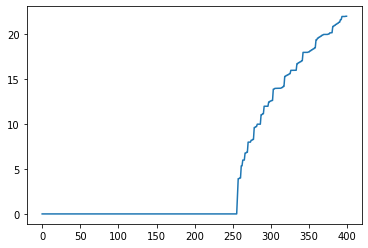

In [46]:
import matplotlib.pyplot as plt
plt.plot(sorted(eigs.real)[:400])

In [49]:
zeros = sorted(eigs.real[np.where(eigs.real < 0.5)])
zeros[0], zeros[-1], len(zeros)

(-2.853941369363397e-14, 5.3899405653322146e-14, 256)

In [48]:
sorted(eigs.real[np.where(eigs.real > 0.5)])[:30]

[2.0000000000034452,
 3.928979642480038,
 3.928979642480068,
 4.000000008978181,
 4.00000000897819,
 5.3562894344969605,
 5.356289435737162,
 5.999999834182989,
 5.999999835413293,
 6.00000000077477,
 6.782609989542713,
 6.782609989542752,
 6.8657816631652295,
 6.8657816657608315,
 7.999999501323196,
 7.999999501323236,
 7.999999815941946,
 7.999999815942205,
 8.208063991960794,
 8.208064002533948,
 8.29717632503435,
 8.297176325034359,
 9.632752856294154,
 9.632752856294207,
 9.727002592585702,
 9.727003426810263,
 9.999999772848636,
 9.999999779059102,
 10.00000093526363,
 10.000019888347504]

In [53]:
 5.999999834182989 - 6

-1.658170107887713e-07